                                          email_text category
0        Hi, I’ve not received my salary this month.       HR
1                        Hey, My printer is offline.       IT
2  Hello, What’s the process to update emergency ...       HR
3       Hello, The internet is extremely slow today.       IT
4   Hello, What are the holiday dates for this year?       HR
category
HR       100
IT       100
Other    100
Name: count, dtype: int64
✅ Accuracy: 1.0000

📄 Classification Report:

              precision    recall  f1-score   support

          HR       1.00      1.00      1.00        20
          IT       1.00      1.00      1.00        20
       Other       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



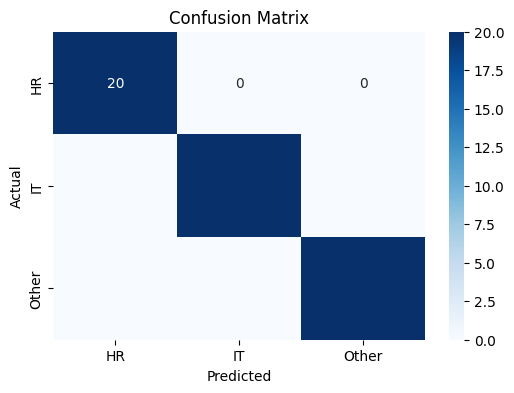

✅ Saved model and vectorizer!


In [ ]:
# 1. Imports
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)



# 3. Check class balance
print(df['category'].value_counts())

# 4. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['email_text'], df['category'], test_size=0.2, random_state=42, stratify=df['category'])

# 5. Vectorize Text
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 6. Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# 7. Predict & Evaluate
y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.4f}")

print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9. Save model & vectorizer
joblib.dump(model, '../models/model.pkl')
joblib.dump(vectorizer, '../models/vectorizer.pkl')
print("✅ Saved model and vectorizer!")


In [ ]:
# 2. Load Dataset
df = pd.read_csv('../data/emails.csv')
print(df.head())

In [ ]:
# 3. Check class balance
print(df['category'].value_counts())



In [ ]:
# 4. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['email_text'], df['category'], test_size=0.2, random_state=42, stratify=df['category'])




In [ ]:
# 5. Vectorize Text
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



In [ ]:
# 6. Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_vec, y_train)



In [ ]:
# 7. Predict & Evaluate
y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.4f}")

print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred))



In [ ]:
# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [ ]:
# 9. Save model & vectorizer
joblib.dump(model, '../models/model.pkl')
joblib.dump(vectorizer, '../models/vectorizer.pkl')
print("✅ Saved model and vectorizer!")